In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('CarPrice_Assignment (1).csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleaning

In [6]:
data['CarName'] = data['CarName'].str.split(' ', expand=True)

In [7]:
data['symboling']=data['symboling'].astype('str')

In [8]:
data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Mengubah nama maxda, nissan, porcshce, toyouta, vokswagen, dan vw menjadi nama yang benar. Dikarenakan nama yang tertera tidak tepat dengan merk yang sebenarnya.

In [9]:
#perubahan nama

data['CarName'] = data['CarName'].replace({'maxda':'mazda','Nissan':'nissan',
                                           'porcshce': 'porsche','toyouta':'toyota',
                                           'vokswagen':'volkswagen','vw':'volkswagen'})

In [10]:
#melakukan drop terhadap car_ID karena tidak digunakan
data = data.drop(['car_ID'],axis=1)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Splitting data kategori dan numerikal 

In [13]:
catcol=data.select_dtypes(include=['object']).columns
data[catcol].head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [14]:
numcol=data.select_dtypes(exclude=['object']).columns
data[numcol].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Exploratory Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00


### Nama mobil-mobil yang ada di Dataset

In [16]:
carcounts=pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'carname','CarName': 'count'})

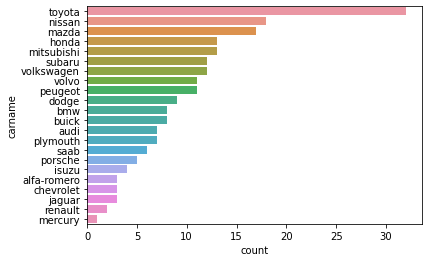

In [18]:
plot_count=sns.barplot(y='carname',x='count',data=carcounts)
plot_count=plt.setp(plot_count.get_xticklabels(), rotation=360)

Dari hasil visualisasi didapatkan bahwa:

- Toyota adalah mobil yang paling cocok
- Merkuri adalah mobil yang paling tidak cocok

### Tipe Bensin yang Digunakan

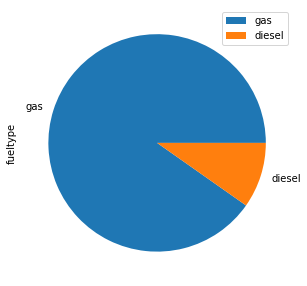

In [24]:
fuel=pd.DataFrame(data['fueltype'].value_counts())
fuelcount=fuel.plot.pie(y='fueltype', figsize=(5, 5))

Dari bahan bakar yang digunakan ternyata paling besar menggunakan gas dibandingkan dengan diesel.

### Persebaran Harga Mobil

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

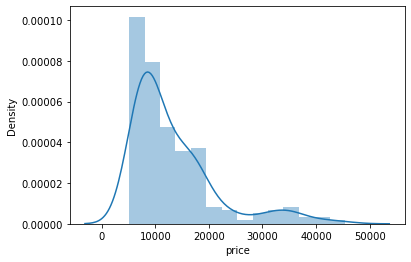

In [26]:
sns.distplot(data['price'],kde=True)

- Data persebaran harga mobil memiliki pola skewed ke kanan

### Harga Mobil Berdasarkan Merk

In [73]:
car = pd.DataFrame(data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
car.head()

,price
CarName,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818


<Figure size 1440x864 with 0 Axes>

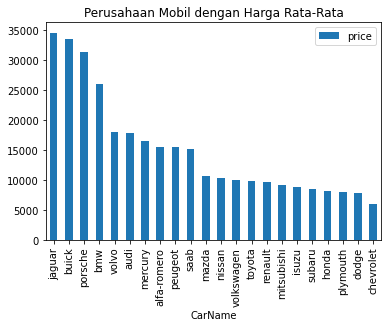

In [74]:
plt.figure(figsize=(20, 12))
car.plot.bar()
plt.title('Perusahaan Mobil dengan Harga Rata-Rata')
plt.show()

Didapatkan bahwa brand mobil yang dapat diberikan titel the big five adalah jaguar, buick, porsche, bmw, dan volvo memiliki harga paling tinggi. 

### Tipe-tipe Mesin

In [62]:
typee=pd.DataFrame(data['enginetype'].value_counts())
typee

,enginetype
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


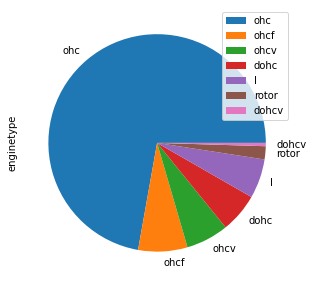

In [69]:
plottypee = typee.plot.pie(y='enginetype', figsize=(5,5))

### Lokasi Mesin 

In [57]:
engine=pd.DataFrame(data['enginelocation'].value_counts())
engine

,enginelocation
front,202
rear,3


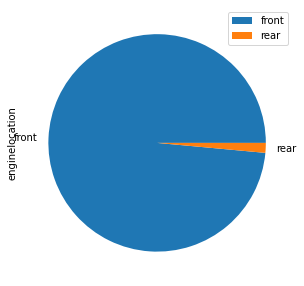

In [70]:
plotengine=engine.plot.pie(y='enginelocation', figsize=(5,5))

### Tipe Bensin

In [76]:
fueltype=pd.DataFrame(data['fueltype'].value_counts())
fueltype

,fueltype
gas,185
diesel,20


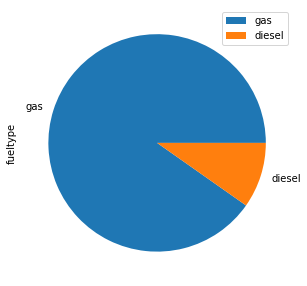

In [79]:
ft = fueltype.plot.pie(y='fueltype', figsize=(5,5))

### Sistem Pembakaran

In [78]:
fuelsys=pd.DataFrame(data['fuelsystem'].value_counts())
fuelsys

,fuelsystem
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
spfi,1
mfi,1


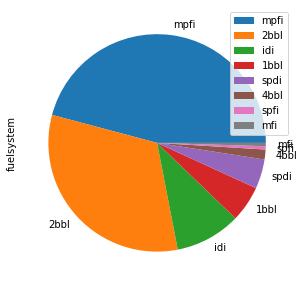

In [80]:
fs = fuelsys.plot.pie(y='fuelsystem',figsize=(5,5))

### Jumlah Pintu

In [81]:
dnumber=pd.DataFrame(data['doornumber'].value_counts())
dnumber

,doornumber
four,115
two,90


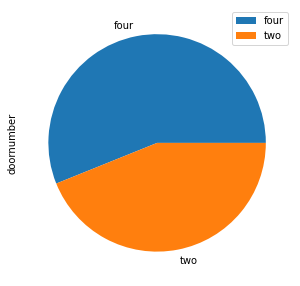

In [82]:
dn=dnumber.plot.pie(y='doornumber',figsize=(5,5))

### Carbody

In [52]:
body

,carbody
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


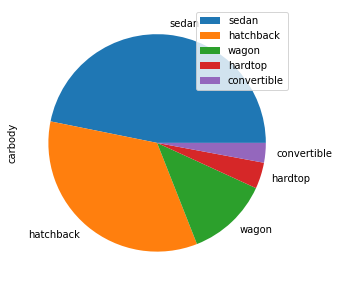

In [71]:
body=pd.DataFrame(data['carbody'].value_counts())
plot = body.plot.pie(y='carbody', figsize=(5,5))

### Jumlah Silinder Mobil

In [64]:
cylinder=pd.DataFrame(data['cylindernumber'].value_counts())
cylinder

,cylindernumber
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


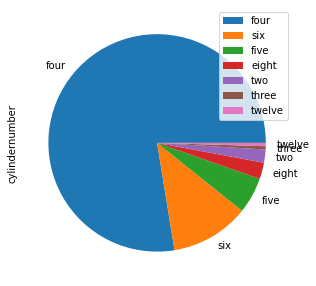

In [72]:
plotcy = cylinder.plot.pie(y='cylindernumber', figsize=(5,5))

### Visualisasi dari kolom data kategorial dengan harga mobil

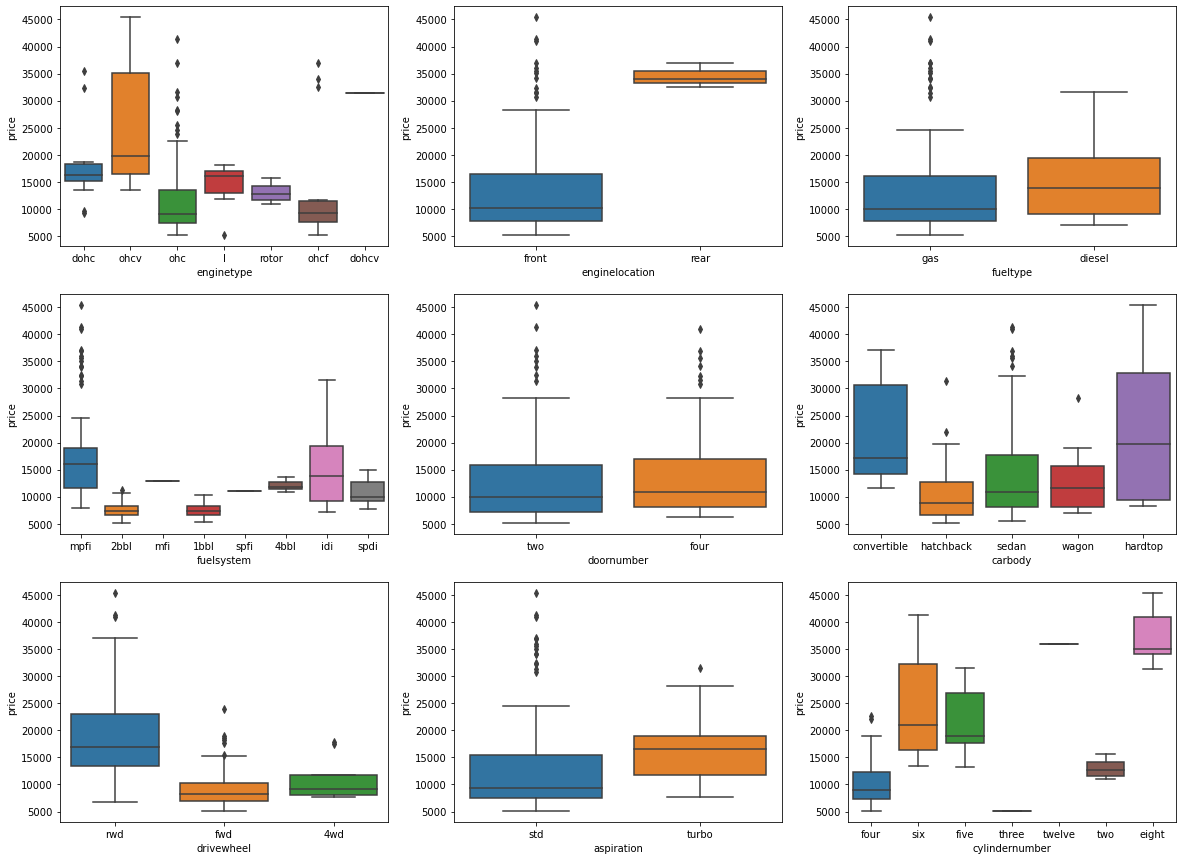

In [33]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='enginetype',y='price',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='enginelocation',y='price',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='fueltype',y='price',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='fuelsystem',y='price',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='doornumber',y='price',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='carbody',y ='price',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='drivewheel',y='price',data=data)
plt.subplot(3,3,8)
sns.boxplot(x='aspiration',y='price',data=data)
plt.subplot(3,3,9)
sns.boxplot(x='cylindernumber',y='price',data=data)

plt.show()

Berdasarkan dari hasil analisa, didapatkan bahwa:

- Enginetype ohcv masuk ke mobil dengan kisaran harga yang lebih tinggi.
- Mobil dengan lokasi mesin (enginelocation) belakang lebih mahal daripada mobil dengan lokasi mesin depan.
- Mobil dengan bahan bakar (fulltype) solar relatif lebih mahal dibandingkan mobil dengan bahan bakar bensin.
- fuelsystem dengan tipe mpfi memiliki harga paling mahal. namun memiliki outlier paling besar.
- doornumber memiliki harga yang relatif sama, namun dengan 2 pintu lebih tinggi
- Dari carbody didapatkan bahwa tipe convertible memiliki harga yang lebih mahal.
- Roda penggerak (drivewheel) memiliki harga paling tinggi adalah rwd
- aspiration memiliki harga paling tinggi adalah turbo.
- Dari cylindernumber memiliki harga paling tinggi dengan silinder 8.

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

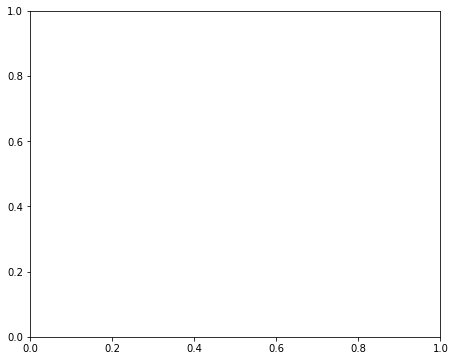